In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_excel('Data/Datasets/AmazonBooks.xlsx')

# EDA

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User Rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


In [5]:
data.drop('Year', axis=1).describe()

,User Rating,Reviews,Price
count,600.000000,600.000000,600.00000
mean,4.627333,13941.730000,12.92000
std,0.225324,14652.813591,10.49717
min,3.300000,37.000000,0.00000
25%,4.500000,4586.500000,7.00000
50%,4.700000,9059.500000,11.00000
75%,4.800000,19587.500000,16.00000
max,4.900000,120727.000000,105.00000


In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

Name           390
Author         275
User Rating     14
Reviews        395
Price           40
Year            12
Genre            2
dtype: int64

There are some duplicates in Name feature

To be specific, there are 210 rows with duplicated book names

## Duplicates Of Name

In [8]:
data[data.Name.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
580,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,25321,5,2020,Fiction
581,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,44174,8,2020,Non Fiction
586,The Wonky Donkey,Craig Smith,4.8,51255,5,2020,Fiction
587,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,4.8,24327,8,2020,Non Fiction


In [9]:
data[data.Name == 'A Man Called Ove: A Novel']

,Name,Author,User Rating,Reviews,Price,Year,Genre
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction


Difference only in publication year

In [10]:
data.drop('Year', axis=1).duplicated().sum()

189

189 books occured at least twice with different publication year

In [11]:
data[['Name', 'Author', 'Genre']].duplicated().sum()

207

In [12]:
data[['Name', 'Author']].duplicated().sum()

208

There's one row with contradictory Genre

### Row with Contradictory Genre

In [13]:
dup_nag = data[['Name', 'Author', 'Genre']].duplicated() # var name stands for name, author, genre
dup_na = data[['Name', 'Author']].duplicated()
dup_nag.compare(dup_na)

,self,other
562,0.0,1.0


Index of this contradictory record is 562

In [14]:
data.loc[562]

Name           The Very Hungry Caterpillar
Author                          Eric Carle
User Rating                            4.9
Reviews                              35965
Price                                    7
Year                                  2020
Genre                          Non Fiction
Name: 562, dtype: object

In [15]:
data.query('Name == "The Very Hungry Caterpillar"')

,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
562,The Very Hungry Caterpillar,Eric Carle,4.9,35965,7,2020,Non Fiction


In [16]:
data[['Name']].duplicated().sum()

210

Same as above there are two rows with same book name and different authors

## Rows with Contradictory Authors

In [17]:
dup_n = data.Name.duplicated()
dup_n.compare(dup_na)

,self,other
580,1.0,0.0
599,1.0,0.0


In [18]:
data[data.Name == data.loc[580].Name]

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
580,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,25321,5,2020,Fiction


In [19]:
data[data.Name == data.loc[599].Name]

,Name,Author,User Rating,Reviews,Price,Year,Genre
97,Educated: A Memoir,Tara Westover,4.7,28729,15,2018,Non Fiction
98,Educated: A Memoir,Tara Westover,4.7,28729,15,2019,Non Fiction
599,Educated: A Memoir,Tara Westover,4.7,45351,11,2020,Non Fiction


## Checking For Same Books With Different Prices

In [20]:
dup_nap = data[['Name', 'Author', 'Price']].duplicated()
dup_na.compare(dup_nap)

,self,other
137,1.0,0.0
283,1.0,0.0
335,1.0,0.0
367,1.0,0.0
383,1.0,0.0
404,1.0,0.0
405,1.0,0.0
413,1.0,0.0
509,1.0,0.0
518,1.0,0.0


In [21]:
data[data.Name == data.loc[137].Name]

,Name,Author,User Rating,Reviews,Price,Year,Genre
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction


In [22]:
data[data.Name == data.loc[283].Name]

,Name,Author,User Rating,Reviews,Price,Year,Genre
282,Quiet: The Power of Introverts in a World That...,Susan Cain,4.6,10009,20,2012,Non Fiction
283,Quiet: The Power of Introverts in a World That...,Susan Cain,4.6,10009,7,2013,Non Fiction


In [23]:
different_prices = dup_na.compare(dup_nap).index
for idx in different_prices:
    display(data[data.Name == data.loc[idx].Name])

,Name,Author,User Rating,Reviews,Price,Year,Genre
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
282,Quiet: The Power of Introverts in a World That...,Susan Cain,4.6,10009,20,2012,Non Fiction
283,Quiet: The Power of Introverts in a World That...,Susan Cain,4.6,10009,7,2013,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault in Our Stars,John Green,4.7,50482,13,2013,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,2011,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,2011,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
412,The Immortal Life of Henrietta Lacks,Rebecca Skloot,4.7,9289,13,2010,Non Fiction
413,The Immortal Life of Henrietta Lacks,Rebecca Skloot,4.7,9289,9,2011,Non Fiction
414,The Immortal Life of Henrietta Lacks,Rebecca Skloot,4.7,9289,9,2012,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
509,To Kill a Mockingbird,Harper Lee,4.8,26234,7,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
516,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2011,Non Fiction
517,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2012,Non Fiction
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
552,Where the Crawdads Sing,Delia Owens,4.8,120727,9,2020,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
562,The Very Hungry Caterpillar,Eric Carle,4.9,35965,7,2020,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
176,"I Am Confident, Brave & Beautiful: A Coloring ...",Hopscotch Girls,4.8,9737,7,2019,Non Fiction
569,"I Am Confident, Brave & Beautiful: A Coloring ...",Hopscotch Girls,4.8,20485,9,2020,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
220,Little Fires Everywhere,Celeste Ng,4.5,25706,12,2018,Fiction
572,Little Fires Everywhere,Celeste Ng,4.5,43514,10,2020,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
124,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2016,Fiction
125,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2017,Fiction
126,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2018,Fiction
127,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2019,Fiction
579,Giraffes Can't Dance,Giles Andreae,4.8,23356,6,2020,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
490,The Wonky Donkey,Craig Smith,4.8,30183,4,2018,Fiction
491,The Wonky Donkey,Craig Smith,4.8,30183,4,2019,Fiction
586,The Wonky Donkey,Craig Smith,4.8,51255,5,2020,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
345,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,4.8,12361,12,2019,Non Fiction
587,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,4.8,24327,8,2020,Non Fiction


My strategy for handling duplicate values will be to discard year and drop all duplicates 

In [24]:
remaining_idx = data.drop('Year', axis=1).drop_duplicates(keep='first').index
data.loc[remaining_idx]

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
595,Live Free Or Die: America (and the World) on t...,Sean Hannity,4.8,20153,15,2020,Non Fiction
596,Burn After Writing,Sharon Jones,4.6,26423,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,Jennie Allen,4.7,12879,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,Katie Stokes,4.7,14128,5,2020,Non Fiction


In [25]:
data.loc[remaining_idx].query('Price == 0')

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the ConstitutionalÂ…,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction


In [26]:
data.loc[remaining_idx].query('Price == 0').index.isin(dup_na)

array([False, False, False, False, False, False, False, False, False])

In [27]:
data1 = data.loc[remaining_idx].copy()

In [28]:
data2 = data1.loc[data1.Price != 0] # without zero price

In [29]:
data2.loc[562]

Name           The Very Hungry Caterpillar
Author                          Eric Carle
User Rating                            4.9
Reviews                              35965
Price                                    7
Year                                  2020
Genre                          Non Fiction
Name: 562, dtype: object

In [30]:
len(data2)

402

In [31]:
data3 = data2.drop(562, axis=0) # without genre contradictory rows
data3.shape

(401, 7)

## Plotting

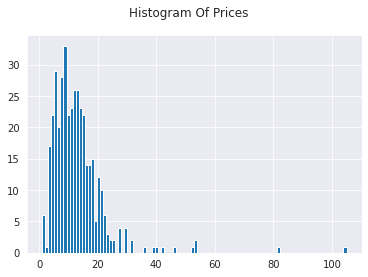

In [32]:
sns.set_style('dark')
data3.Price.hist(bins=100);
plt.suptitle('Histogram Of Prices');

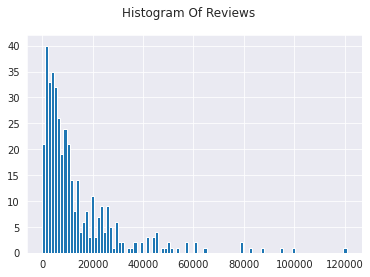

In [33]:
data3.Reviews.hist(bins=100);
plt.suptitle('Histogram Of Reviews');

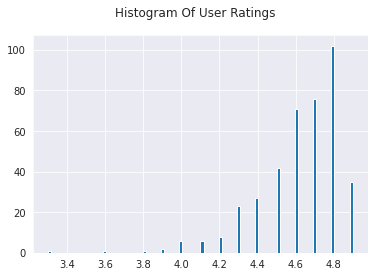

In [34]:
data3['User Rating'].hist(bins=100);
plt.suptitle('Histogram Of User Ratings');

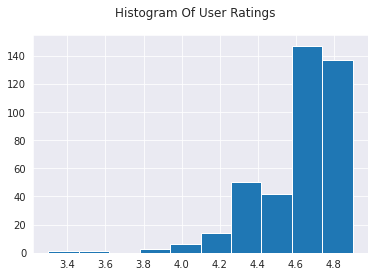

In [35]:
data3['User Rating'].hist(bins=10);
plt.suptitle('Histogram Of User Ratings');

## Normality Test for Prices

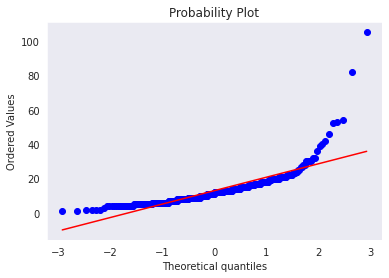

In [36]:
import pylab

stats.probplot(data3.Price, dist='norm', plot=pylab);

In [37]:
stats.shapiro(data3.Price)

ShapiroResult(statistic=0.6865218877792358, pvalue=1.285971696518941e-26)

In [38]:
stats.normaltest(data3.Price)

NormaltestResult(statistic=400.5708526905198, pvalue=1.0402663074417081e-87)

Price doesn't follow Normal distribution

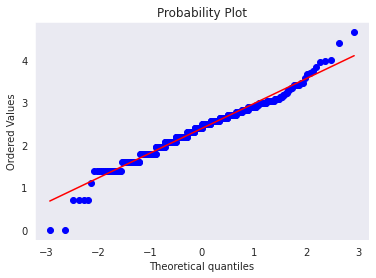

ShapiroResult(statistic=0.975750744342804, pvalue=3.045574203497381e-06)
NormaltestResult(statistic=21.15708304134699, pvalue=2.5456447156268083e-05)


In [39]:
price_log = np.log(data3.Price)

stats.probplot(price_log, dist='norm', plot=pylab);
plt.show()
print(stats.shapiro(price_log))
print(stats.normaltest(price_log))

Same as price

# Statistical Inference

In [40]:
data3.Genre.value_counts()

Non Fiction    220
Fiction        181
Name: Genre, dtype: int64

In [41]:
groups = data3.groupby('Genre')
fiction = groups.get_group('Fiction')
non_fiction = groups.get_group('Non Fiction')

In [42]:
stats.mannwhitneyu(fiction.Price, non_fiction.Price)

MannwhitneyuResult(statistic=16377.5, pvalue=0.002192864941307673)

In [43]:
display(fiction.Price.median(),
        non_fiction.Price.median())

10.0

12.0

On average, non-fictional books have higher prices than fictional ones.

In [44]:
display(f'reviews of fiction books: {fiction.Reviews.median()}',
        f'reviews of non-fiction books: {non_fiction.Reviews.median()}',
        )
stats.mannwhitneyu(fiction.Reviews.median(), non_fiction.Reviews.median())

'reviews of fiction books: 10760.0'

'reviews of non-fiction books: 5974.5'

MannwhitneyuResult(statistic=1.0, pvalue=1.0)

In [46]:
fiction['User Rating']

1      4.6
3      4.7
5      4.4
6      4.7
7      4.7
      ... 
590    4.8
591    4.0
592    4.5
593    4.7
594    4.9
Name: User Rating, Length: 181, dtype: float64

In [49]:
display('reviews of fiction books: ',
        fiction['User Rating'].median(),
        'reviews of non-fiction books: ',
        non_fiction['User Rating'].median()
        )
stats.mannwhitneyu(fiction['User Rating'].median(), non_fiction["User Rating"].median())

'reviews of fiction books: '

4.7

'reviews of non-fiction books: '

4.6

MannwhitneyuResult(statistic=1.0, pvalue=1.0)

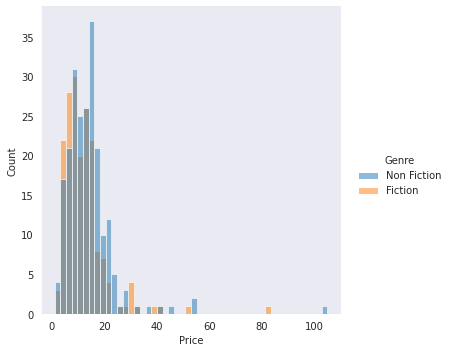

In [50]:
sns.displot(data=data3, x='Price', hue='Genre')

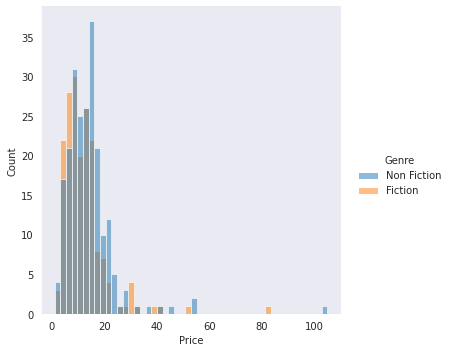

In [50]:
sns.displot(data=data3, x='Price', hue='Genre')

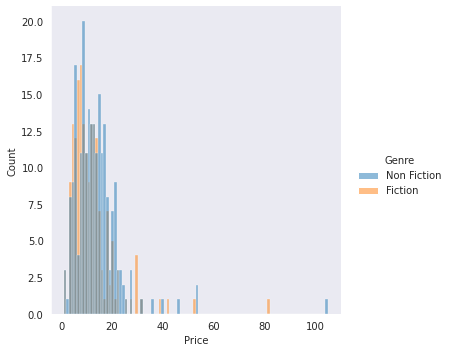

In [51]:
sns.displot(data=data3, x='Price', hue='Genre', bins=100);

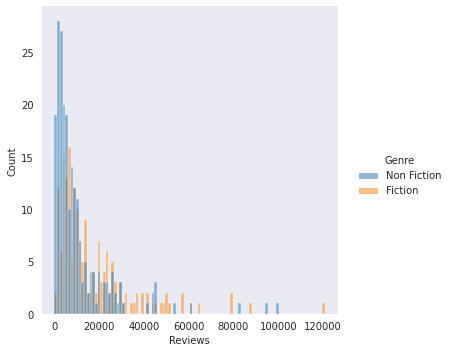

In [54]:
sns.displot(data=data3, x='Reviews', hue='Genre', bins=100);

In [ ]:
sns.displot(data=data3, x='User Ratings')